# Assignbment 6
# Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv
dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

sns.set_theme(style="whitegrid",font_scale = 1)

## Dataset used: 
    iris.csv 
    
### Data description:
Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

In [242]:
from sklearn import datasets 

In [243]:
help(datasets.load_iris)

Help on function load_iris in module sklearn.datasets._base:

load_iris(*, return_X_y=False, as_frame=False)
    Load and return the iris dataset (classification).
    
    The iris dataset is a classic and very easy multi-class classification
    dataset.
    
    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <iris_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including columns with
        appropriate dtypes (numeric). 

In [244]:
data=sns.load_dataset('iris')

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [246]:
data.isnull().isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [247]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

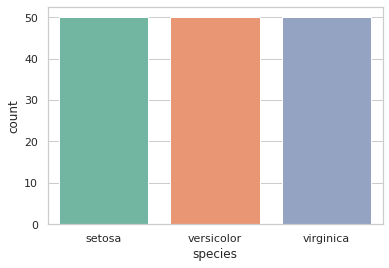

In [248]:
sns.countplot(data=data,x='species',palette='Set2')
plt.show()

In [249]:
import scipy.stats as st
def normality_test(data):
    print('Skewness : ',data.skew())
    print('Kurtosis : ',data.kurt())
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(data,color='b')
    plt.title('KDE plot')
    plt.xlabel('Scores')
    plt.ylabel('Probability Density')
    plt.subplot(1, 2, 2) 
    st.probplot(data,plot=plt,fit=True)
    plt.show()

Text(0.5, 0.5, 'PW')

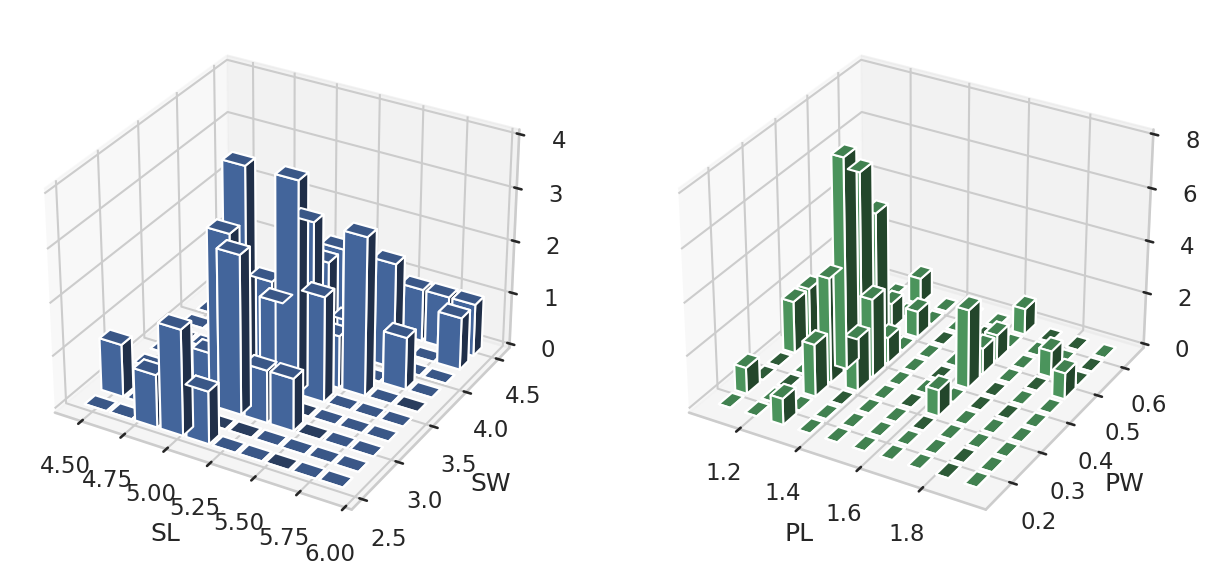

In [252]:
fig = plt.figure(figsize=(10,5), dpi = 150)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

H, _x, _y = np.histogram2d(data.iloc[:50,0],data.iloc[:50,1])
_xx, _yy = np.meshgrid(_x[1:], _y[1:])
xx, yy, HH = _xx.ravel(), _yy.ravel(), H.ravel()

ax1.bar3d(xx, yy, np.zeros_like(HH), 0.13, 0.13, HH, shade=True, color='b')

H, _x, _y = np.histogram2d(data.iloc[:50,0],data.iloc[:50,1])
_xx, _yy = np.meshgrid(_x[1:], _y[1:])
xx, yy, HH = _xx.ravel(), _yy.ravel(), H.ravel()

ax1.bar3d(xx, yy, np.zeros_like(HH), 0.13, 0.13, HH, shade=True, color='r')

ax1.set_xlabel('SL')
ax1.set_ylabel('SW')

H, _x, _y = np.histogram2d(data.iloc[:50,2], data.iloc[:50,3])
_xx, _yy = np.meshgrid(_x[1:], _y[1:])
xx, yy, HH = _xx.ravel(), _yy.ravel(), H.ravel()

ax2.bar3d(xx, yy, np.zeros_like(HH), 0.04, 0.04, HH, shade=True, color='g')

ax2.set_xlabel('PL')
ax2.set_ylabel('PW')

## Data Preprocessing

In [223]:
rdata=data.copy(deep=True)
rdata.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [224]:
X=rdata[['sepal_length', 'sepal_width','petal_length','petal_width']]
Y=rdata['species']

In [225]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(X)
scaled=pd.DataFrame(scaled,columns=['sepal_length', 'sepal_width','petal_length','petal_width'])
scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [226]:
from sklearn import naive_bayes
help(naive_bayes.GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB).
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 |  ----------
 |  

## Naive Bayes Classifier

In [227]:
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [228]:
def train_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    conf_matrix=confusion_matrix(y_test, y_pred)
    '''TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    
    error_rate=(FP+FN)/(TP+FP+TN+FN)
    acc=(TP+TN)/(TP+FP+TN+FN)
    prec=TP/(TP+FP)
    rec=TP/(TP+FN)'''
    
    print('Classification Metrics :\n')
    print(classification_report(y_test, y_pred))
    ''' print('Accuracy = %.3f'%(accuracy_score(y_test, y_pred)))
    print('Precision = %.3f'%(precision_score(y_test, y_pred)))
    print('Recall = %.3f'%(recall_score(y_test, y_pred)))

    
    print('Accuracy = %.3f'%(acc))
    print('Precision = %.3f'%(prec))
    print('Recall = %.3f'%(rec))
    print('Error Rate = %.3f'%(error_rate))
    print('\n')'''
    plt.figure(figsize=(8,5))
    p=sns.heatmap(conf_matrix,annot=True,cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    return conf_matrix

In [237]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)
y_test.value_counts()

versicolor    18
setosa        16
virginica     11
Name: species, dtype: int64

Classification Metrics :

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



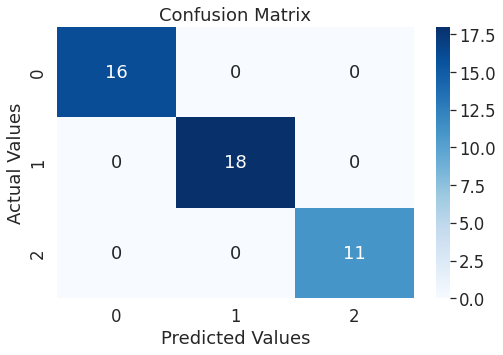

In [238]:
model=naive_bayes.GaussianNB()
c=train_model(model,x_train,y_train,x_test,y_test)

Skewness :  0.23133746309642822
Kurtosis :  -0.6225130156590515


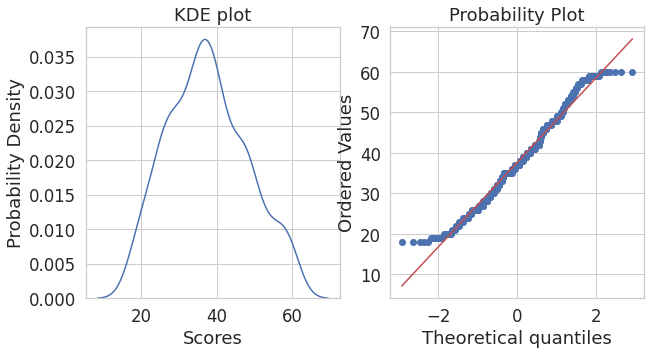

Skewness :  -0.0540372961573467
Kurtosis :  -0.6450087431607008


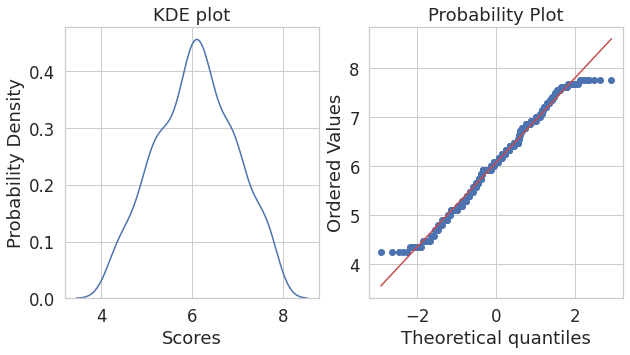

Skewness :  0.49502362888993623
Kurtosis :  -0.4058775625580293


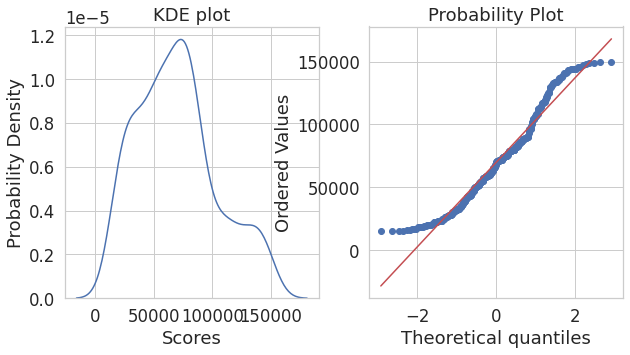

Skewness :  -0.019374391028588567
Kurtosis :  -0.6554861544107791


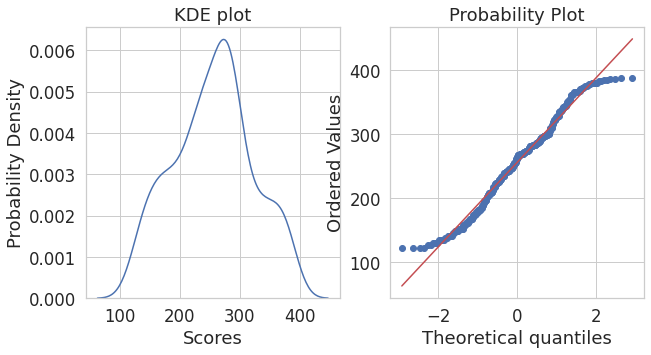

In [135]:
normality_test(rdata.Age)
normality_test(np.sqrt(rdata.Age))
normality_test(rdata['EstimatedSalary'])
normality_test(np.sqrt(rdata['EstimatedSalary']))

In [140]:
data.Age=np.log(data.Age)
data.EstimatedSalary=np.log(data.EstimatedSalary)
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(data[['Age','EstimatedSalary']])
scaled=pd.DataFrame(scaled,columns=['Age','EstimatedSalary'])
scaled.head()

,Age,EstimatedSalary
0,-2.213796,-2.095414
1,-0.111659,-2.002996
2,-1.134501,-0.623805
3,-1.004637,-0.115976
4,-2.213796,0.402359


In [141]:
X=pd.get_dummies(data[['Gender']])
X['Age']=scaled.Age
X['EstimatedSalary']=scaled.EstimatedSalary
X.head()

,Gender_Female,Gender_Male,Age,EstimatedSalary
0,0,1,-2.213796,-2.095414
1,0,1,-0.111659,-2.002996
2,1,0,-1.134501,-0.623805
3,1,0,-1.004637,-0.115976
4,0,1,-2.213796,0.402359


Classification Metrics :

Accuracy = 0.867
Precision = 0.821
Recall = 0.780
Error Rate = 0.133




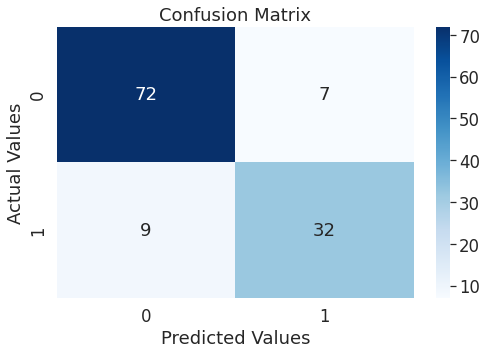

In [142]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)
model=LogisticRegression()
c=train_model(model,x_train,y_train,x_test,y_test)